---------------------------------------
Affichage données 2d : d64.txt standardisées
---------------------------------------
Affichage données 2d : d64.txt standardisées KMeans (3 clusters)
Elbow method analysis - Elapsed time: 1.3561010360717773 seconds
Silouhette analysis - Elapsed time: 1.6531236171722412 seconds


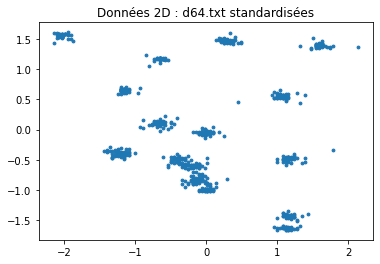

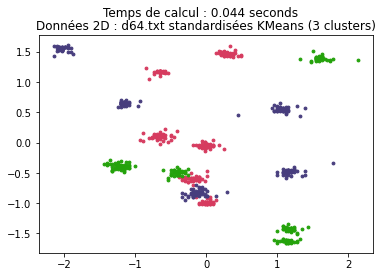

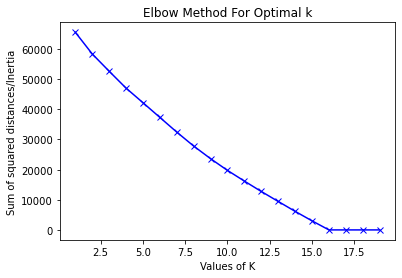

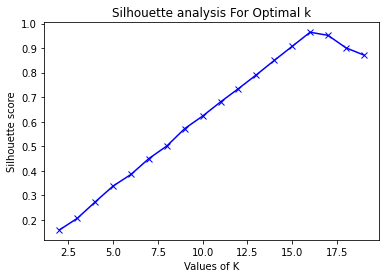

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

import pandas as pd

from sklearn.metrics import silhouette_score 

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff

path = './new-data/'

def initData(filename):
    #return arff.loadarff(open(path+filename, 'r'))
    return pd.read_csv(path+filename, sep=" ", encoding = "ISO-8859-1", skipinitialspace=True)

def standardise(raw):
    scaler = StandardScaler()
    return scaler.fit_transform(raw)
    
def plot2d(filename, doStandardise=False):
    databrut = initData(filename)
    datanp = databrut.to_numpy()
    if doStandardise:
        datanp = standardise(datanp)
    text = filename + (" standardisées" if doStandardise else "")
    print("---------------------------------------")
    print("Affichage données 2d : " + text)
    f0 = datanp[:,0] # tous les élements de la première colonne
    f1 = datanp[:,1] # tous les éléments de la deuxième colonne
    plt.figure()
    plt.scatter(f0, f1, s=8)
    plt.title("Données 2D : " + text)

def clusterKMeans(filename, nbCluster, doStandardise=False):
    start = time.time()
    databrut = initData(filename)
    datanp = databrut.to_numpy()
    if doStandardise:
        datanp = standardise(datanp)
    label = KMeans(n_clusters=nbCluster, random_state=0).fit_predict(datanp)
    end = time.time()
    text = filename + (" standardisées" if doStandardise else "") + " KMeans (" + str(nbCluster) + " clusters)"
    print("---------------------------------------")
    print("Affichage données 2d : " + text)
    plt.figure()
    for index in range(nbCluster):
        filteredLabel = datanp[label == index]
        color = (np.random.random(),np.random.random(),np.random.random())
        plt.scatter(filteredLabel[:,0] , filteredLabel[:,1], c = [color], s=8)
    plt.title("Données 2D : " + text)
    plt.suptitle("Temps de calcul : " + str(round(end - start, 4)) + " seconds")
    
def evaluateKMeansElbow(filename, maxNbClusters, doStandardise=False):
    start = time.time()
    Sum_of_squared_distances = []
    K = range(1,maxNbClusters)
    databrut = initData(filename)
    datanp = databrut.to_numpy()
    plt.figure()
    if doStandardise:
        datanp = standardise(datanp)
    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(datanp)
        Sum_of_squared_distances.append(kmeans.inertia_)
    end = time.time()
    print("Elbow method analysis - Elapsed time: " + str(end - start) + " seconds")
    plt.plot(K,Sum_of_squared_distances,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Sum of squared distances/Inertia") 
    plt.title("Elbow Method For Optimal k")

def evaluateKMeansSilhouette(filename, maxNbClusters, doStandardise=False):
    start = time.time()
    silhouette_avg = []
    K = range(2,maxNbClusters)
    databrut = initData(filename)
    datanp = databrut.to_numpy()
    plt.figure()
    if doStandardise:
        datanp = standardise(datanp)
    for num_clusters in K:
        # initialise kmeans
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(datanp)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg.append(silhouette_score(datanp, cluster_labels))
    end = time.time()
    print("Silouhette analysis - Elapsed time: " + str(end - start) + " seconds")
    plt.plot(K,silhouette_avg,"bx-")
    plt.xlabel("Values of K") 
    plt.ylabel("Silhouette score") 
    plt.title("Silhouette analysis For Optimal k")

#databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
#print(databrut)
#print(datanpplt.show

##################################################################
# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
filename = "d64.txt"
plot2d(filename, True)
#plot2d(filename, True)
clusterKMeans(filename, 3, True)
evaluateKMeansElbow(filename, 20, True)
evaluateKMeansSilhouette(filename, 20, True)

plt.show()




#plot3d("golfball.arff")


########################################################################
# AUTRES VISUALISATION DU JEU DE DONNEES
# (histogrammes par exemple,)
# But : essayer d'autres types de plot 
########################################################################

########################################################################
# STANDARDISER ET VISUALISER 
# But : comparer des méthodes de standardisation, ...
########################################################################